# Imbalance datasets **Under-sampling**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Supervised Learning/Some Important Topic for Machine Learning/Handling Imbalance DataSets/Datasets/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Check null value
df.isnull().values.any()

False

In [7]:
#Create independent and Dependent Features
columns = df.columns.tolist()
print(columns)
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
print(columns)
print()
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]
print()
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
print(X_outliers)
print()
print(X_outliers.shape)
# Print the shapes of X & Y
print()
print(X.shape)
print(Y.shape)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


[[0.37454012 0.95071431 0.73199394 ... 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 ... 0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 ... 0.63755747 0.88721274 0.47221493]
 ...
 [0.32434691 0.98353994 0.40827419 ... 0.51216976 0.9162782  0.84937254]
 [0.44524954 0.3220868  0.833226   ... 0.77285876 0.39904372 0.14115936]
 [0.41545999 0.95754477 0.4161859  ... 0.87661358 0.30901467 0.27756001]]

(284807, 30)

(284807, 30)
(284807,)


In [8]:
# Another way to do above task
x2 = df.drop(['Class'],axis=1)
x2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [9]:
y2 = df.Class
y2

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
print(x2.shape)
print(y2.shape)

(284807, 30)
(284807,)


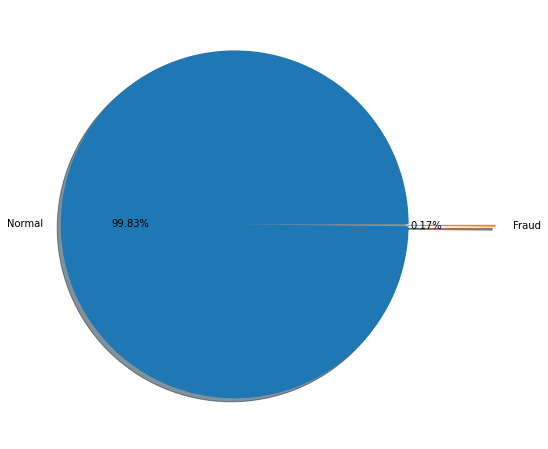

In [11]:
plt.figure(figsize=(10,8))
plt.pie(df['Class'].value_counts(),explode=[0,0.5],autopct="%.2f%%",shadow=True,labels=['Normal','Fraud'])
plt.show()

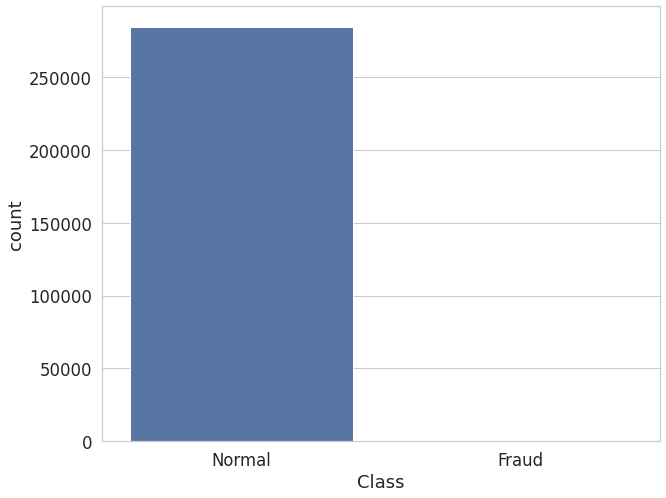

In [12]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
sns.set_style(style="whitegrid")
a = sns.countplot(data=df,x="Class")
a.set_xticklabels(labels=['Normal','Fraud'])
plt.show()

In [13]:
## Get the Fraud and the normal dataset
normal = df[df['Class']==0]
fraud = df[df['Class']==1]
print(normal.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [14]:
# Implementing Undersampling for Handling Imbalanced 
near_miss = NearMiss(random_state=42)
X_new,Y_new = near_miss.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [15]:
# 984 means 0 = 492 and 1 = 492
X_new.shape,Y_new.shape

((984, 30), (984,))

In [16]:
# for x2,and y2
x_new2,y_new2 = near_miss.fit_sample(x2,y2)
x_new2.shape,y_new2.shape

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


((984, 30), (984,))

In [17]:
from collections import Counter

In [18]:
print("Orginal datasets shape {}".format(Counter(Y)))
print("Resampled datasets shape {}".format(Counter(Y_new)))

Orginal datasets shape Counter({0: 284315, 1: 492})
Resampled datasets shape Counter({0: 492, 1: 492})


In [19]:
# simple way
np.unique(y_new2,return_counts=True)

(array([0, 1]), array([492, 492]))

In [20]:
np.arange(-2,3)

array([-2, -1,  0,  1,  2])

# Imbalance Datasets **Over-Sampling**

In [21]:
smote_tomek = SMOTETomek(random_state=42)
X_res , Y_res = smote_tomek.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [22]:
print(X_res.shape,Y_res.shape)

(567562, 30) (567562,)


In [23]:
print("Orginal datasets shape {}".format(Counter(Y)))
print("Resampled datasets shape {}".format(Counter(Y_res)))

Orginal datasets shape Counter({0: 284315, 1: 492})
Resampled datasets shape Counter({0: 283781, 1: 283781})


In [24]:
# In this example I use SMOTETomek which is a method of imblearn. SMOTETomek is a hybrid method
# which uses an under sampling method (Tomek) in with an over sampling method (SMOTE).
# ratio=0.5 means it makes half data poit of the total number of large amount of data contains that class
smote_tomek2 = SMOTETomek(ratio=0.5)
X_res2 , Y_res2 = smote_tomek2.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [25]:
print(X_res2.shape,Y_res2.shape)

(424776, 30) (424776,)


In [26]:
print("Orginal datasets shape {}".format(Counter(Y)))
print("Resampled datasets shape {}".format(Counter(Y_res2)))

Orginal datasets shape Counter({0: 284315, 1: 492})
Resampled datasets shape Counter({0: 283467, 1: 141309})


In [27]:
# RandomOverSampler to handle imbalanced data
# ratio=1 means it makes equal data poit of the total number of large amount of data contains that class
randmo_sampler = RandomOverSampler(ratio=1)
X_res3 , Y_res3 = randmo_sampler.fit_sample(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [28]:
print(X_res3.shape,Y_res3.shape)

(568630, 30) (568630,)


In [29]:
print("Orginal datasets shape {}".format(Counter(Y)))
print("Resampled datasets shape {}".format(Counter(Y_res3)))

Orginal datasets shape Counter({0: 284315, 1: 492})
Resampled datasets shape Counter({0: 284315, 1: 284315})


# Handling Imbalance datasets Different way

## Cross Validation Like KFOLD and Hyperpaqrameter Tuning

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
10.0**np.arange(-2,3)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [37]:
model = LogisticRegression(max_iter=350)
grid_params = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}
cv = KFold(n_splits=5,shuffle=False,random_state=None)

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7)

In [39]:
clf = GridSearchCV(estimator=model,param_grid=grid_params,cv=cv,scoring="f1_macro",n_jobs=-1)

In [40]:
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=350, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_macro', verbose=0)

In [41]:
y_pred = clf.predict(x_test)

In [44]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print()
print("Classification Report: ",classification_report(y_test,y_pred))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred))

Accuracy score:  0.9991456292499094

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.82      0.60      0.69       137

    accuracy                           1.00     85443
   macro avg       0.91      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix: 
 [[85288    18]
 [   55    82]]


In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Now apply Randomforestclassifier
class_weight = dict({0:1,1:100})
rfc_model = RandomForestClassifier(class_weight=class_weight)

In [48]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 100}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [49]:
y_pred2 = rfc_model.predict(x_test)

In [50]:
print("Accuracy score: ",accuracy_score(y_test,y_pred2))
print()
print("Classification Report: ",classification_report(y_test,y_pred2))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred2))

Accuracy score:  0.9995318516437859

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.98      0.72      0.83       137

    accuracy                           1.00     85443
   macro avg       0.99      0.86      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix: 
 [[85304     2]
 [   38    99]]


# Under Sampling

In [51]:
ns = NearMiss(sampling_strategy=0.8)

In [52]:
xtrain_ns , ytrain_ns = ns.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [54]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(ytrain_ns)))

The number of classes before fit Counter({0: 199009, 1: 355})
The number of classes after fit Counter({0: 443, 1: 355})


In [55]:
rfc_model2 = RandomForestClassifier()

In [57]:
rfc_model2.fit(xtrain_ns,ytrain_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
y_pred3 = rfc_model2.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred3))
print()
print("Classification Report: ",classification_report(y_test,y_pred3))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred3))

Accuracy score:  0.8595906042624908

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.86      0.92     85306
           1       0.01      0.91      0.02       137

    accuracy                           0.86     85443
   macro avg       0.51      0.88      0.47     85443
weighted avg       1.00      0.86      0.92     85443


Confusion Matrix: 
 [[73322 11984]
 [   13   124]]


In [59]:
os = RandomOverSampler(sampling_strategy=0.75)

In [60]:
xtrain_os,ytrain_os = os.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [61]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(ytrain_os)))

The number of classes before fit Counter({0: 199009, 1: 355})
The number of classes after fit Counter({0: 199009, 1: 149256})


In [62]:
rfc_model3 = RandomForestClassifier()

In [63]:
rfc_model3.fit(xtrain_ns,ytrain_ns)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [64]:
y_pred4 = rfc_model3.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred4))
print()
print("Classification Report: ",classification_report(y_test,y_pred4))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred4))

Accuracy score:  0.8492796367168756

Classification Report:                precision    recall  f1-score   support

           0       1.00      0.85      0.92     85306
           1       0.01      0.91      0.02       137

    accuracy                           0.85     85443
   macro avg       0.50      0.88      0.47     85443
weighted avg       1.00      0.85      0.92     85443


Confusion Matrix: 
 [[72441 12865]
 [   13   124]]


In [65]:
os2 = SMOTETomek(0.75)

In [66]:
xtrain_os2,ytrain_os2 = os2.fit_sample(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [67]:
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(ytrain_os2)))

The number of classes before fit Counter({0: 199009, 1: 355})
The number of classes after fit Counter({0: 198265, 1: 148512})


In [69]:
classifier = RandomForestClassifier()
classifier.fit(xtrain_os2,ytrain_os2)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
y_pred5 = classifier.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred5))
print()
print("Classification Report: ",classification_report(y_test,y_pred5))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred5))

Accuracy score:  0.9995201479348805

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.87      0.82      0.85       137

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix: 
 [[85289    17]
 [   24   113]]


# Ensemble Techniques

In [71]:
from imblearn.ensemble import EasyEnsembleClassifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24

In [72]:
easy = EasyEnsembleClassifier()

In [74]:
easy.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

EasyEnsembleClassifier(base_estimator=None, n_estimators=10, n_jobs=1,
                       random_state=None, replacement=False,
                       sampling_strategy='auto', verbose=0, warm_start=False)

In [75]:
y_pred6 = classifier.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,y_pred6))
print()
print("Classification Report: ",classification_report(y_test,y_pred6))
print()
print("Confusion Matrix: \n",confusion_matrix(y_test,y_pred6))

Accuracy score:  0.9995201479348805

Classification Report:                precision    recall  f1-score   support

           0       1.00      1.00      1.00     85306
           1       0.87      0.82      0.85       137

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix: 
 [[85289    17]
 [   24   113]]
